Consider <a href="https://github.com/coviddata/coviddata/tree/master/data">the covid data</a>, Cumulative cases by country and date. Fit the data of USA and Poland using polyfit and present results in figure.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime

In [2]:
cases = pd.read_csv('https://coviddata.github.io/coviddata/v1/countries/cases.csv', index_col=0).T
cases.head()

Country,United States,India,Brazil,United Kingdom,Russia,France,Spain,Italy,Turkey,Germany,...,North Ireland,Saint Barthelemy,Vanuatu,Congo,Greenland,Guam,Guernsey,Jersey,Palestine,Puerto Rico
2020-01-22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,2,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,5,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
date_unconverted = cases.index.tolist()
date_unconverted[:5] # Checking that everything ok 

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [4]:
USA = cases['United States'].tolist()
Poland = cases['Poland'].tolist()

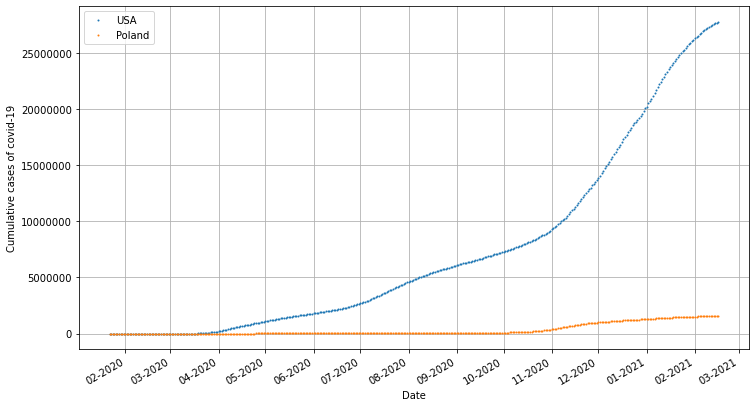

In [5]:
plt.rcParams['figure.figsize'] = [12, 7]
date = [datetime.datetime.strptime(d, "%Y-%m-%d").date() for d in date_unconverted]  # convert to datetime
ax = plt.gca()  # get axes
formatter = mdates.DateFormatter("%m-%Y")  # format as dates
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator() # tick every month
ax.xaxis.set_major_locator(locator)
ax.ticklabel_format(axis='y', style='plain')
plt.plot(date, USA, 'o', markersize=1)
plt.plot(date, Poland, 'o', markersize=1)
plt.xlabel("Date")
plt.ylabel("Cumulative cases of covid-19")
plt.legend(["USA","Poland"])
plt.gcf().autofmt_xdate() #
plt.grid()
plt.show()

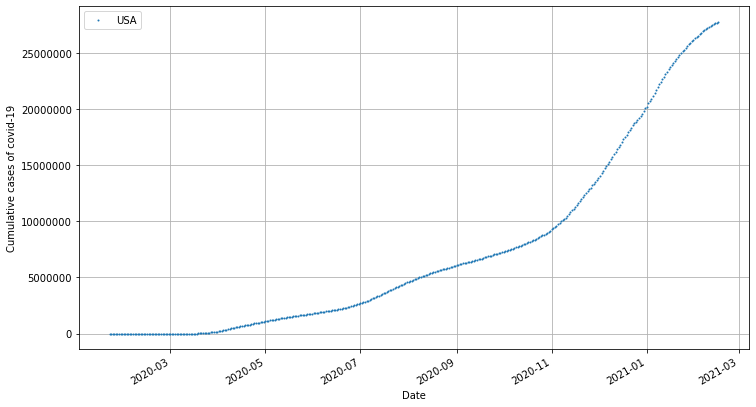

In [6]:
ax = plt.gca()  # get axes
locator = mdates.MonthLocator() # tick every month
ax.ticklabel_format(axis='y', style='plain')
plt.rcParams['figure.figsize'] = [15, 7]
plt.plot(date, USA, 'o', markersize=1)
plt.xlabel("Date")
plt.ylabel("Cumulative cases of covid-19")
plt.legend(["USA"])
plt.gcf().autofmt_xdate() # 
plt.grid()
plt.show()

In [7]:
x_data = [x for x in range(0,len(date))] # conversion date

In [8]:
N = 10

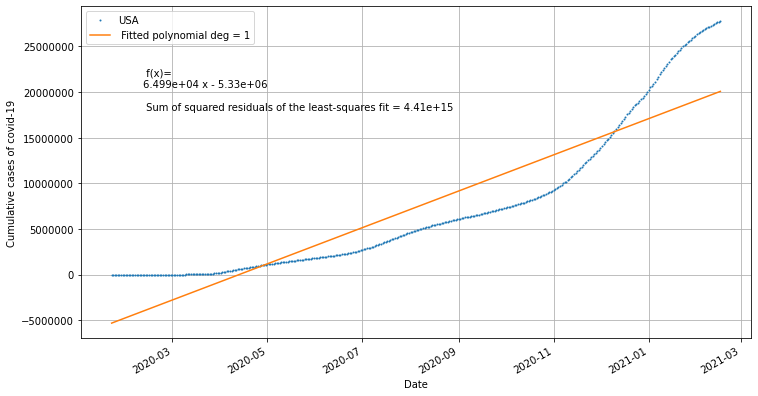

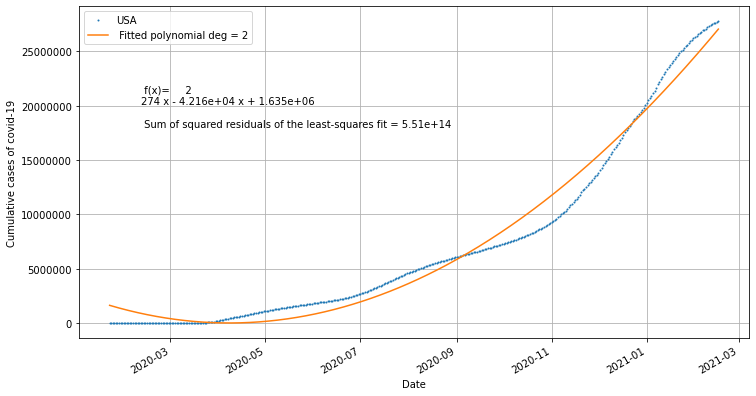

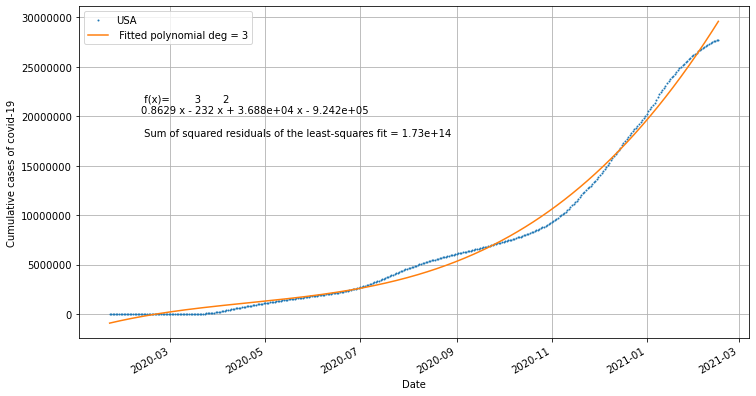

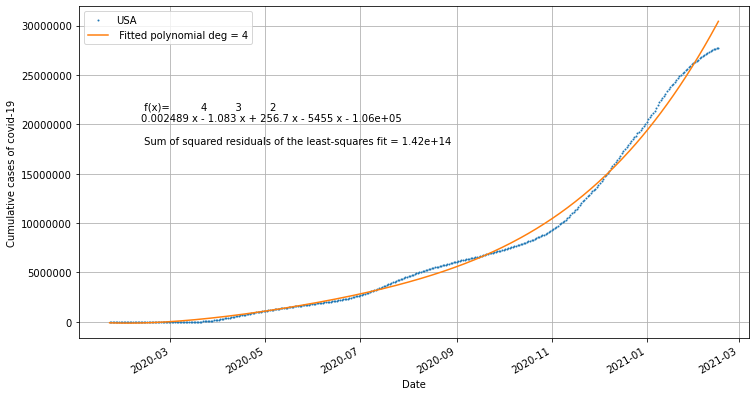

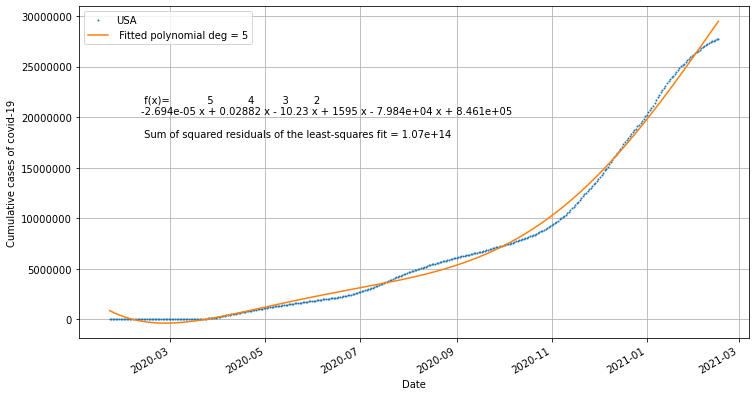

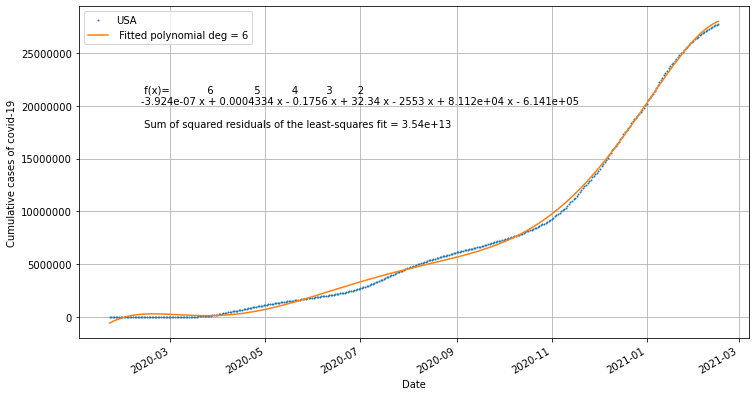

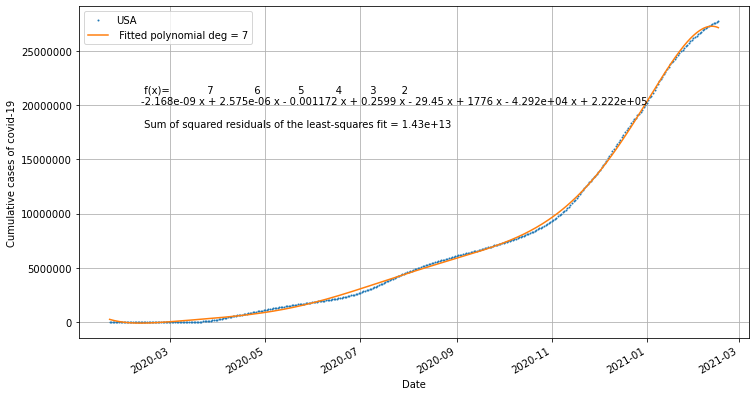

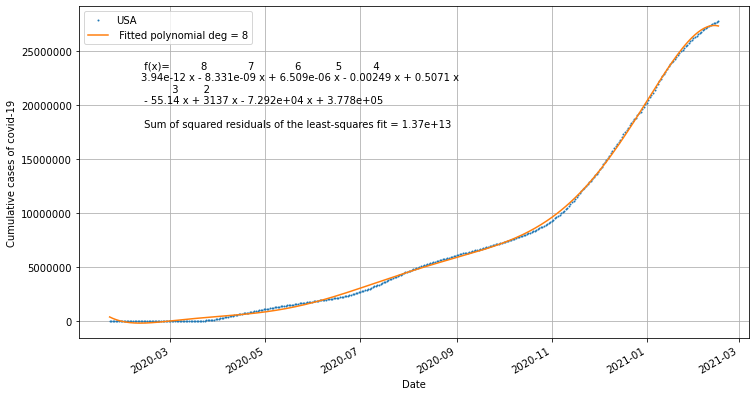

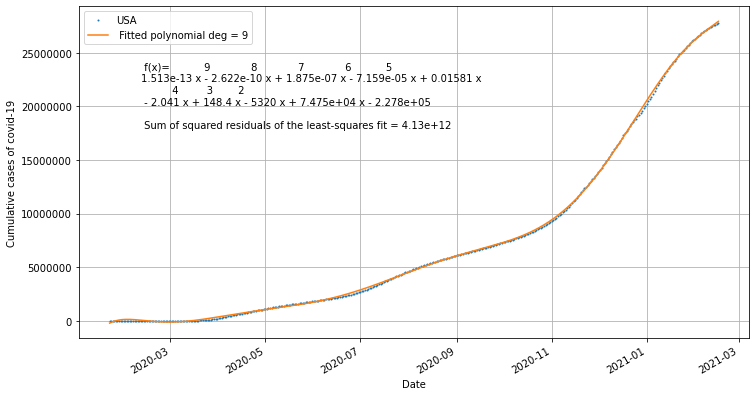

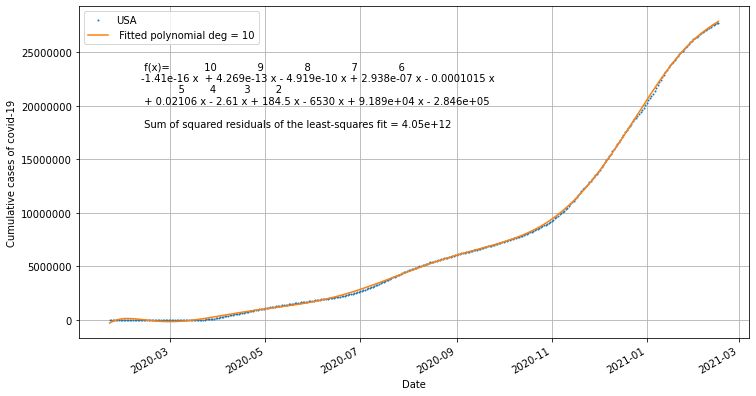

In [9]:
plt.rcParams['figure.figsize'] = [12, 8*N]
plt.tight_layout()
for n in range(N):
    poly_coefficients,residuals,trank,tsv,trcond = np.polyfit(x_data,USA,n+1,full=True)
    poly_function = np.poly1d(poly_coefficients)
    plt.subplot(N,1,n+1)
    ax = plt.gca()  # get axes
    locator = mdates.MonthLocator() # tick every month
    ax.ticklabel_format(axis='y', style='plain')
    plt.plot(date, USA, 'o', markersize=1)
    plt.plot(date, poly_function(x_data), markersize=1)
    plt.xlabel("Date")
    plt.ylabel("Cumulative cases of covid-19")
    plt.legend(["USA",f" Fitted polynomial deg = {n+1}"])
    residuals_formated = format(residuals[0],"5.2e")
    plt.text(date[20],18000000,f" f(x)={poly_function} \n\n Sum of squared residuals of the least-squares fit = {residuals_formated}")
    plt.gcf().autofmt_xdate() # 
    plt.grid()
    plt.show()

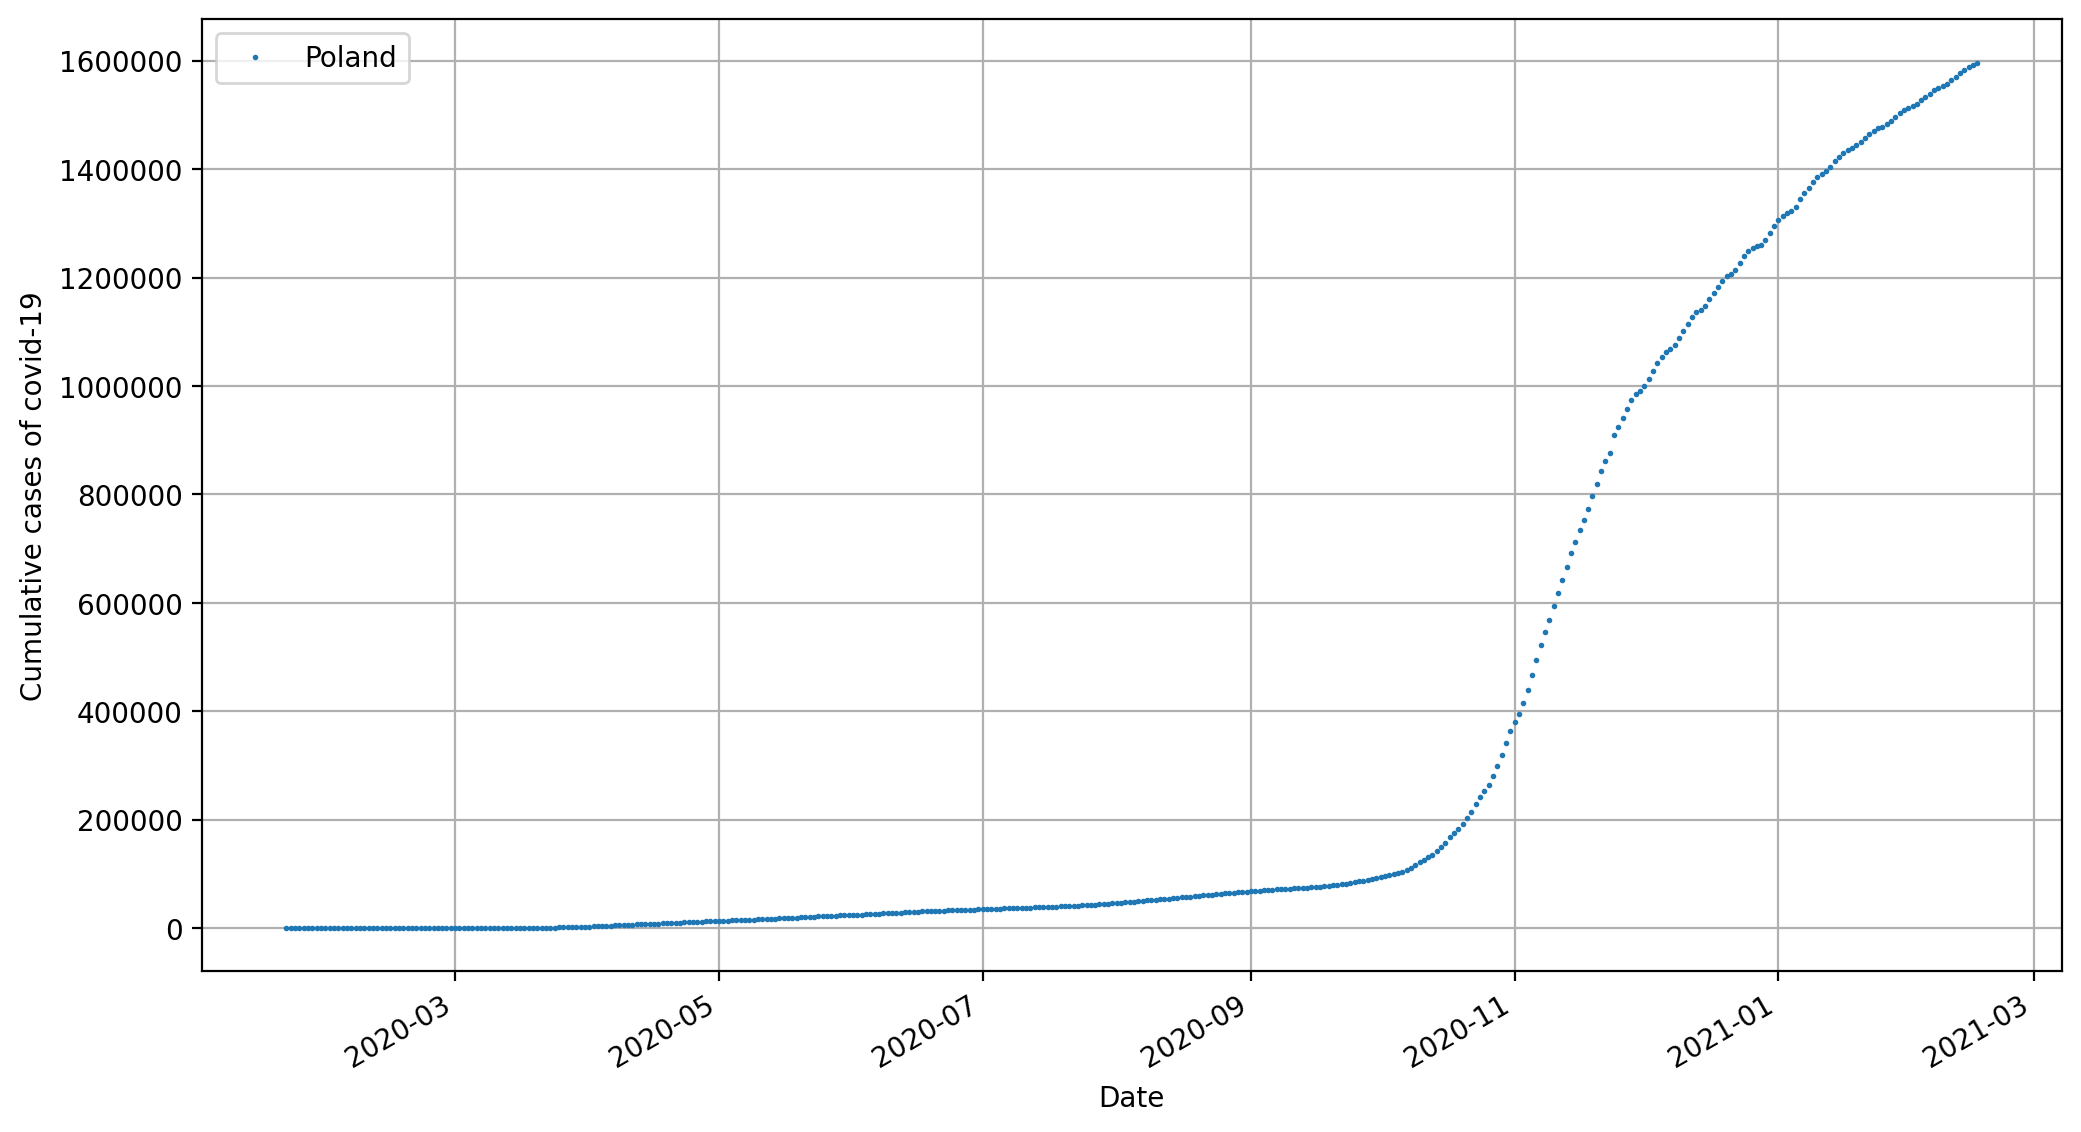

In [16]:
ax = plt.gca()  # get axes
locator = mdates.MonthLocator() # tick every month
ax.ticklabel_format(axis='y', style='plain')
plt.rcParams['figure.figsize'] = [12, 7]
plt.plot(date, Poland, 'o', markersize=1)
plt.xlabel("Date")
plt.ylabel("Cumulative cases of covid-19")
plt.legend(["Poland"])
plt.gcf().autofmt_xdate() # 
plt.grid()
plt.show()

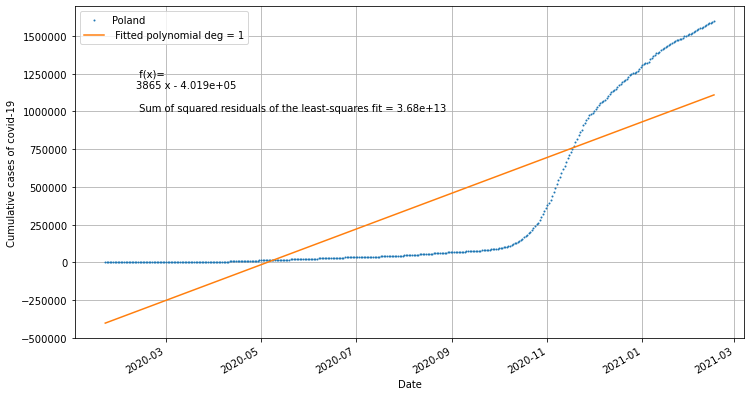

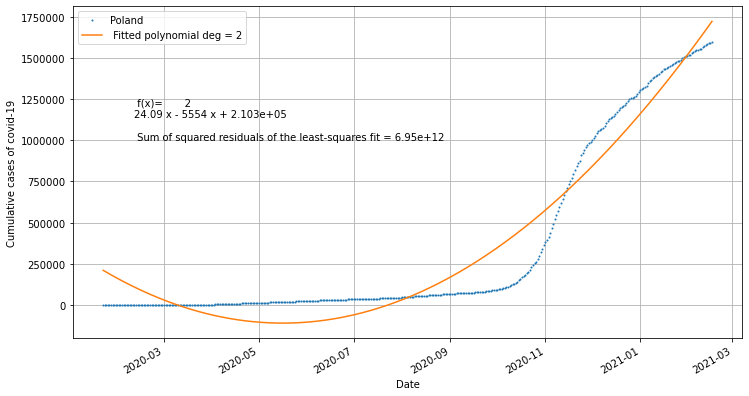

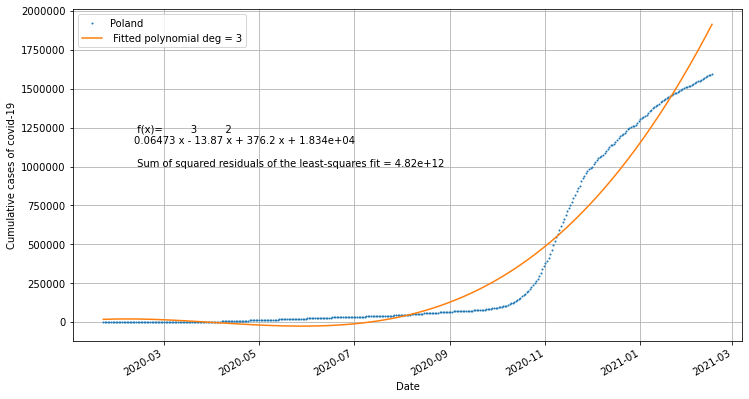

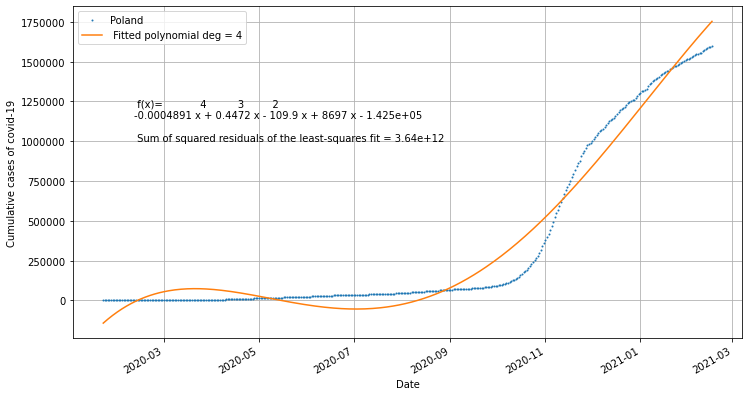

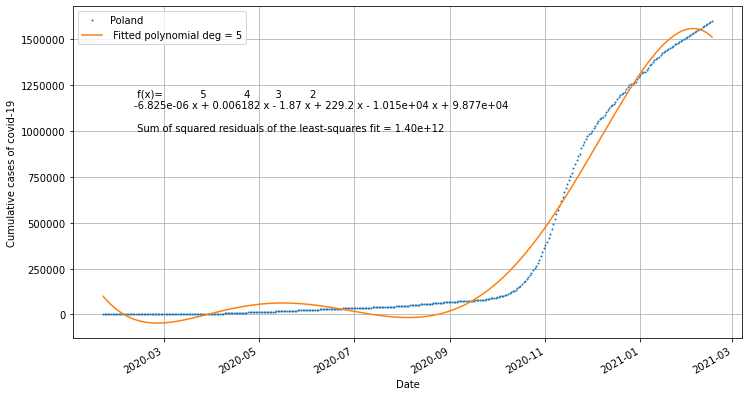

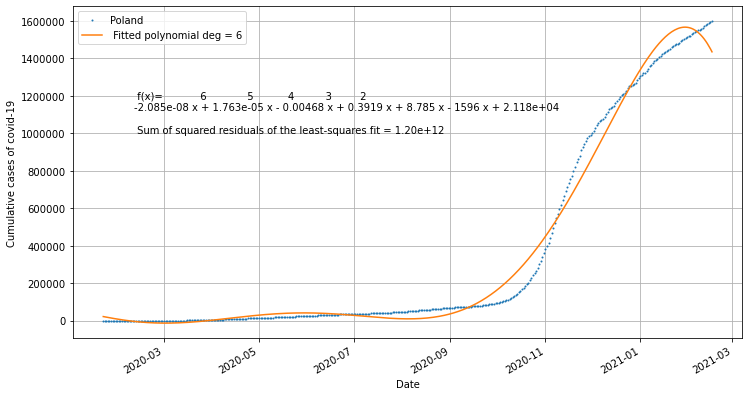

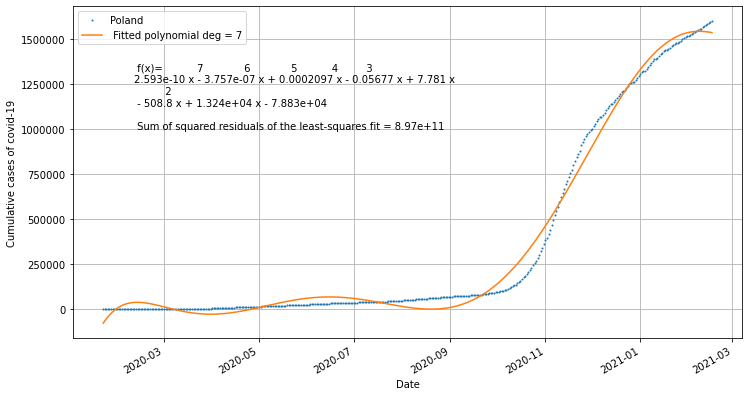

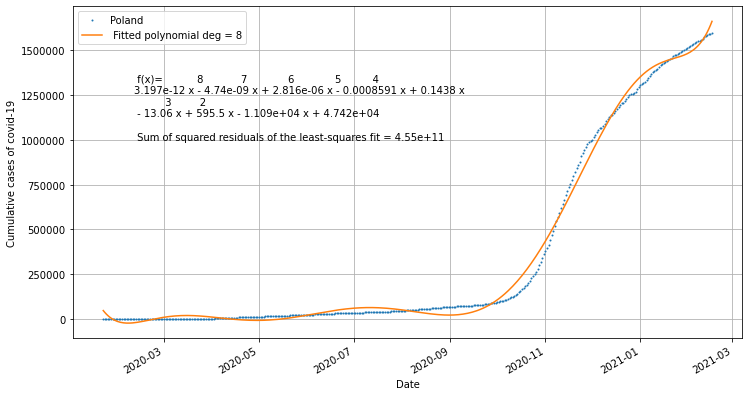

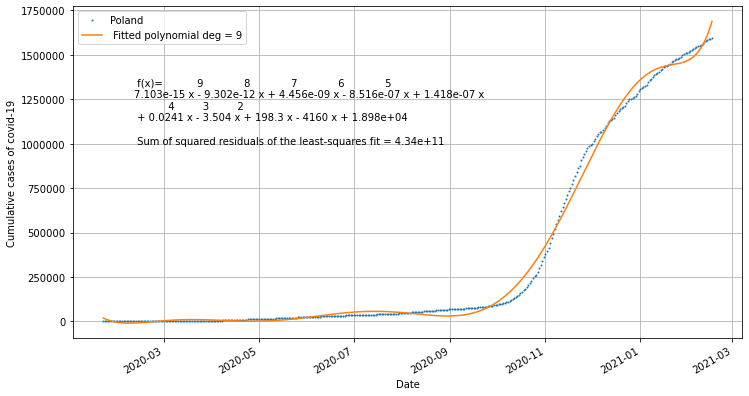

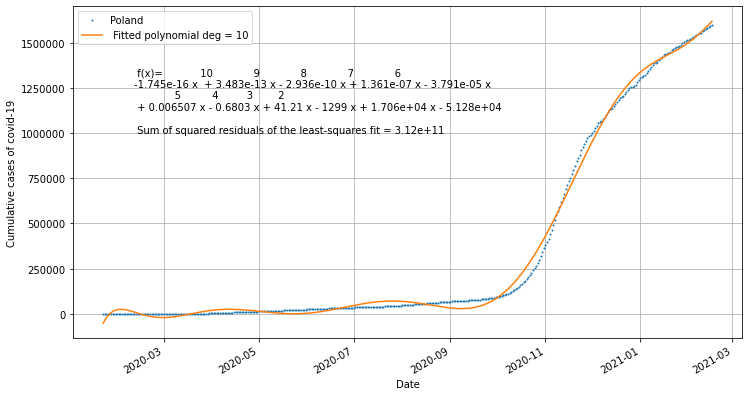

In [11]:
plt.rcParams['figure.figsize'] = [12, 8*N]
plt.tight_layout()
for n in range(N):
    poly_coefficients,residuals,trank,tsv,trcond = np.polyfit(x_data,Poland,n+1,full=True)
    poly_function = np.poly1d(poly_coefficients)
    plt.subplot(N,1,n+1)
    ax = plt.gca()  # get axes
    locator = mdates.MonthLocator() # tick every month
    ax.ticklabel_format(axis='y', style='plain')
    plt.plot(date, Poland, 'o', markersize=1)
    plt.plot(date, poly_function(x_data), markersize=1)
    plt.xlabel("Date")
    plt.ylabel("Cumulative cases of covid-19")
    plt.legend(["Poland",f" Fitted polynomial deg = {n+1}"])
    residuals_formated = format(residuals[0],"5.2e")
    plt.text(date[20],1000000,f" f(x)={poly_function} \n\n Sum of squared residuals of the least-squares fit = {residuals_formated}")
    plt.gcf().autofmt_xdate() # 
    plt.grid()
    plt.show()

In [12]:
USA_deg_poly = 6
Poland_deg_poly = 8

In [13]:
poly_coefficients_USA = np.polyfit(x_data,USA,USA_deg_poly)
poly_function_USA = np.poly1d(poly_coefficients_USA)

poly_coefficients_Poland = np.polyfit(x_data,Poland,Poland_deg_poly)
poly_function_Poland = np.poly1d(poly_coefficients_Poland)

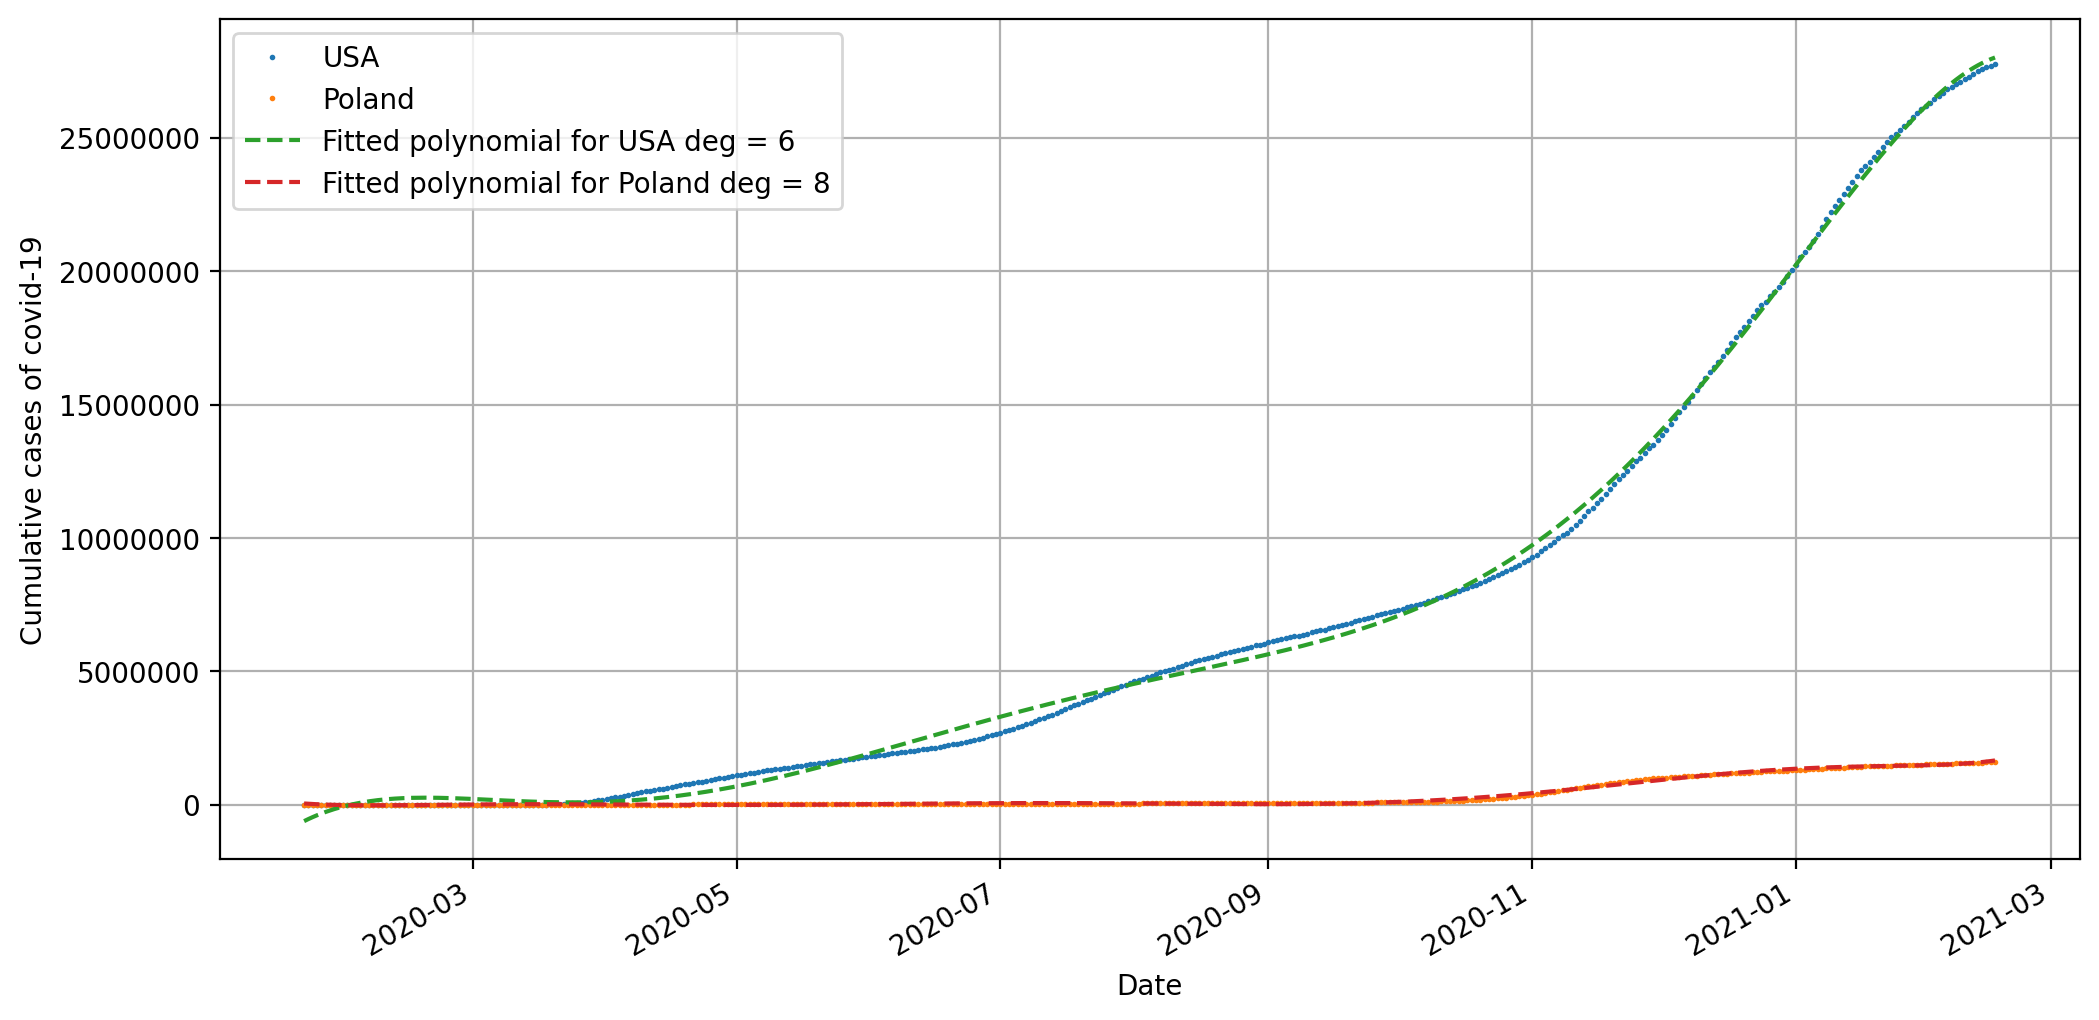

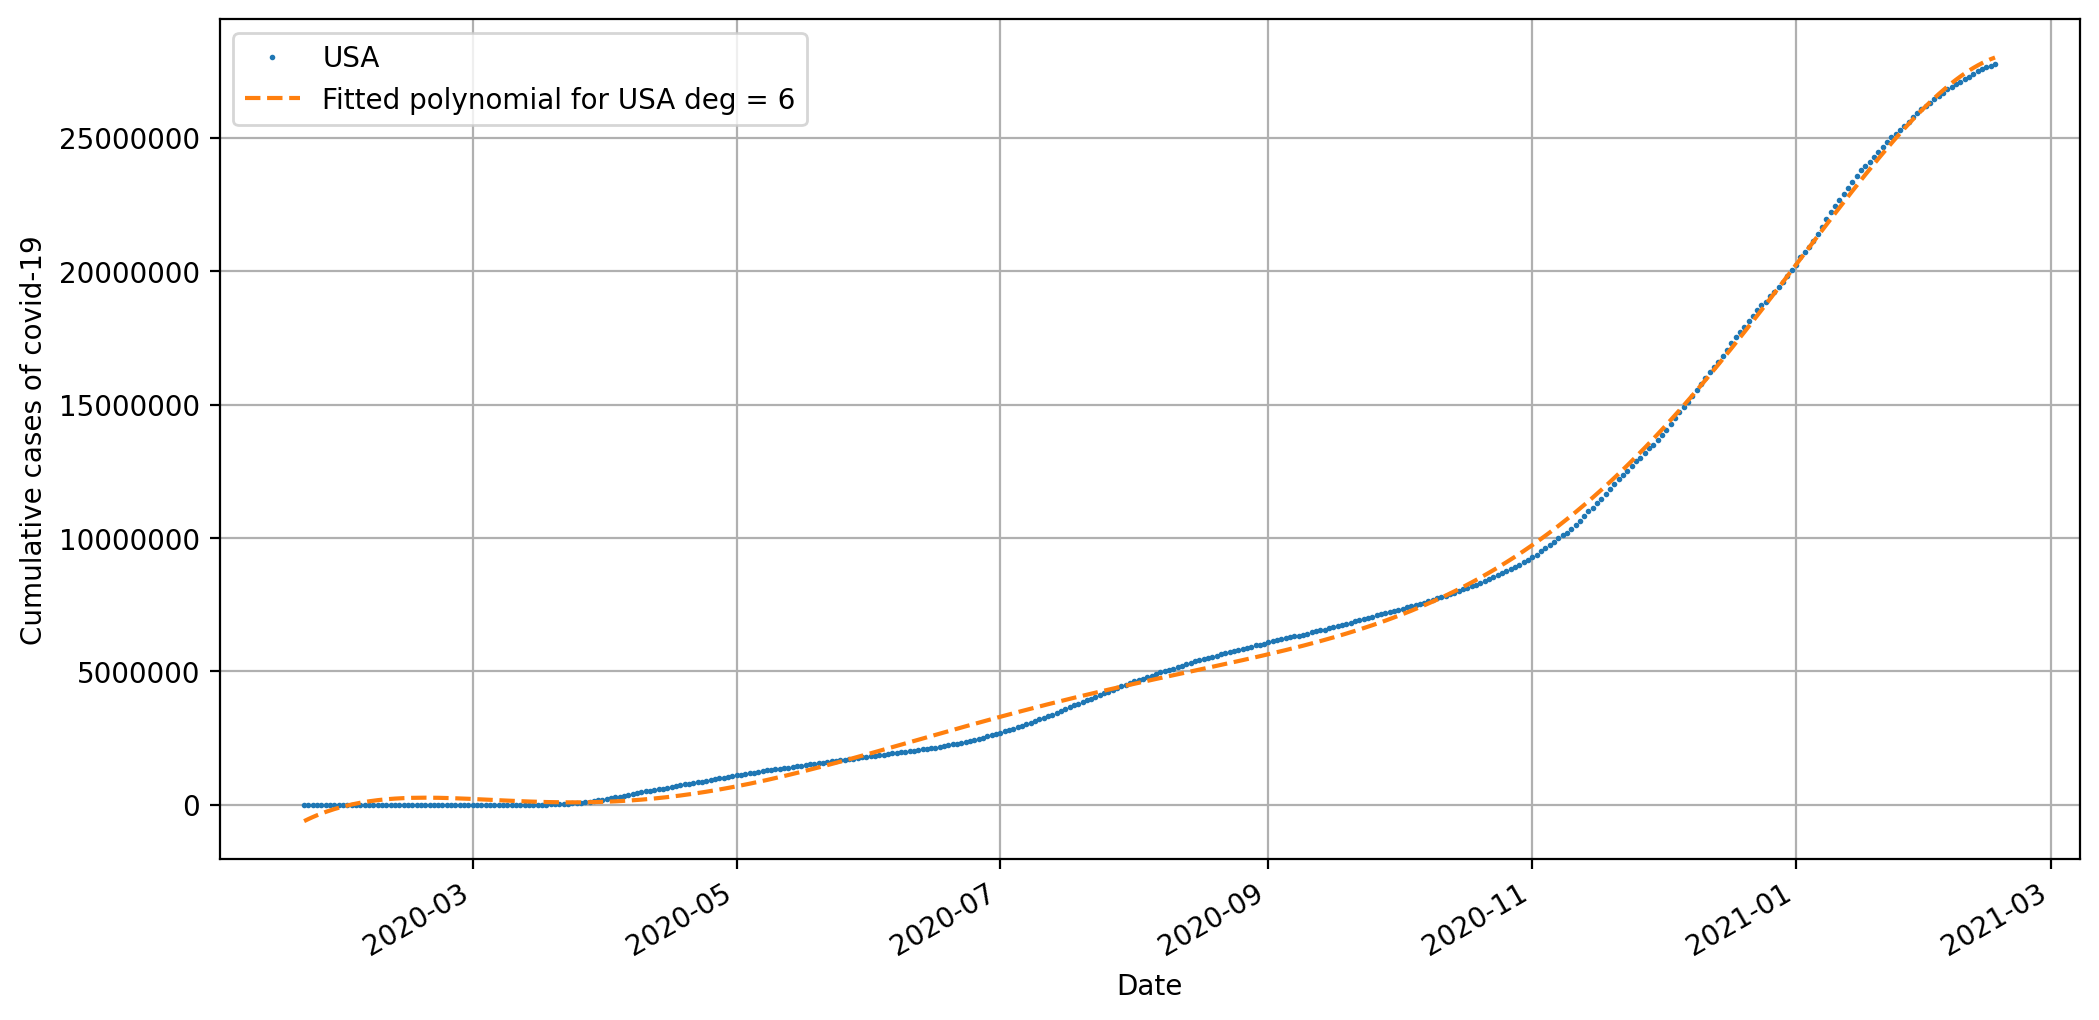

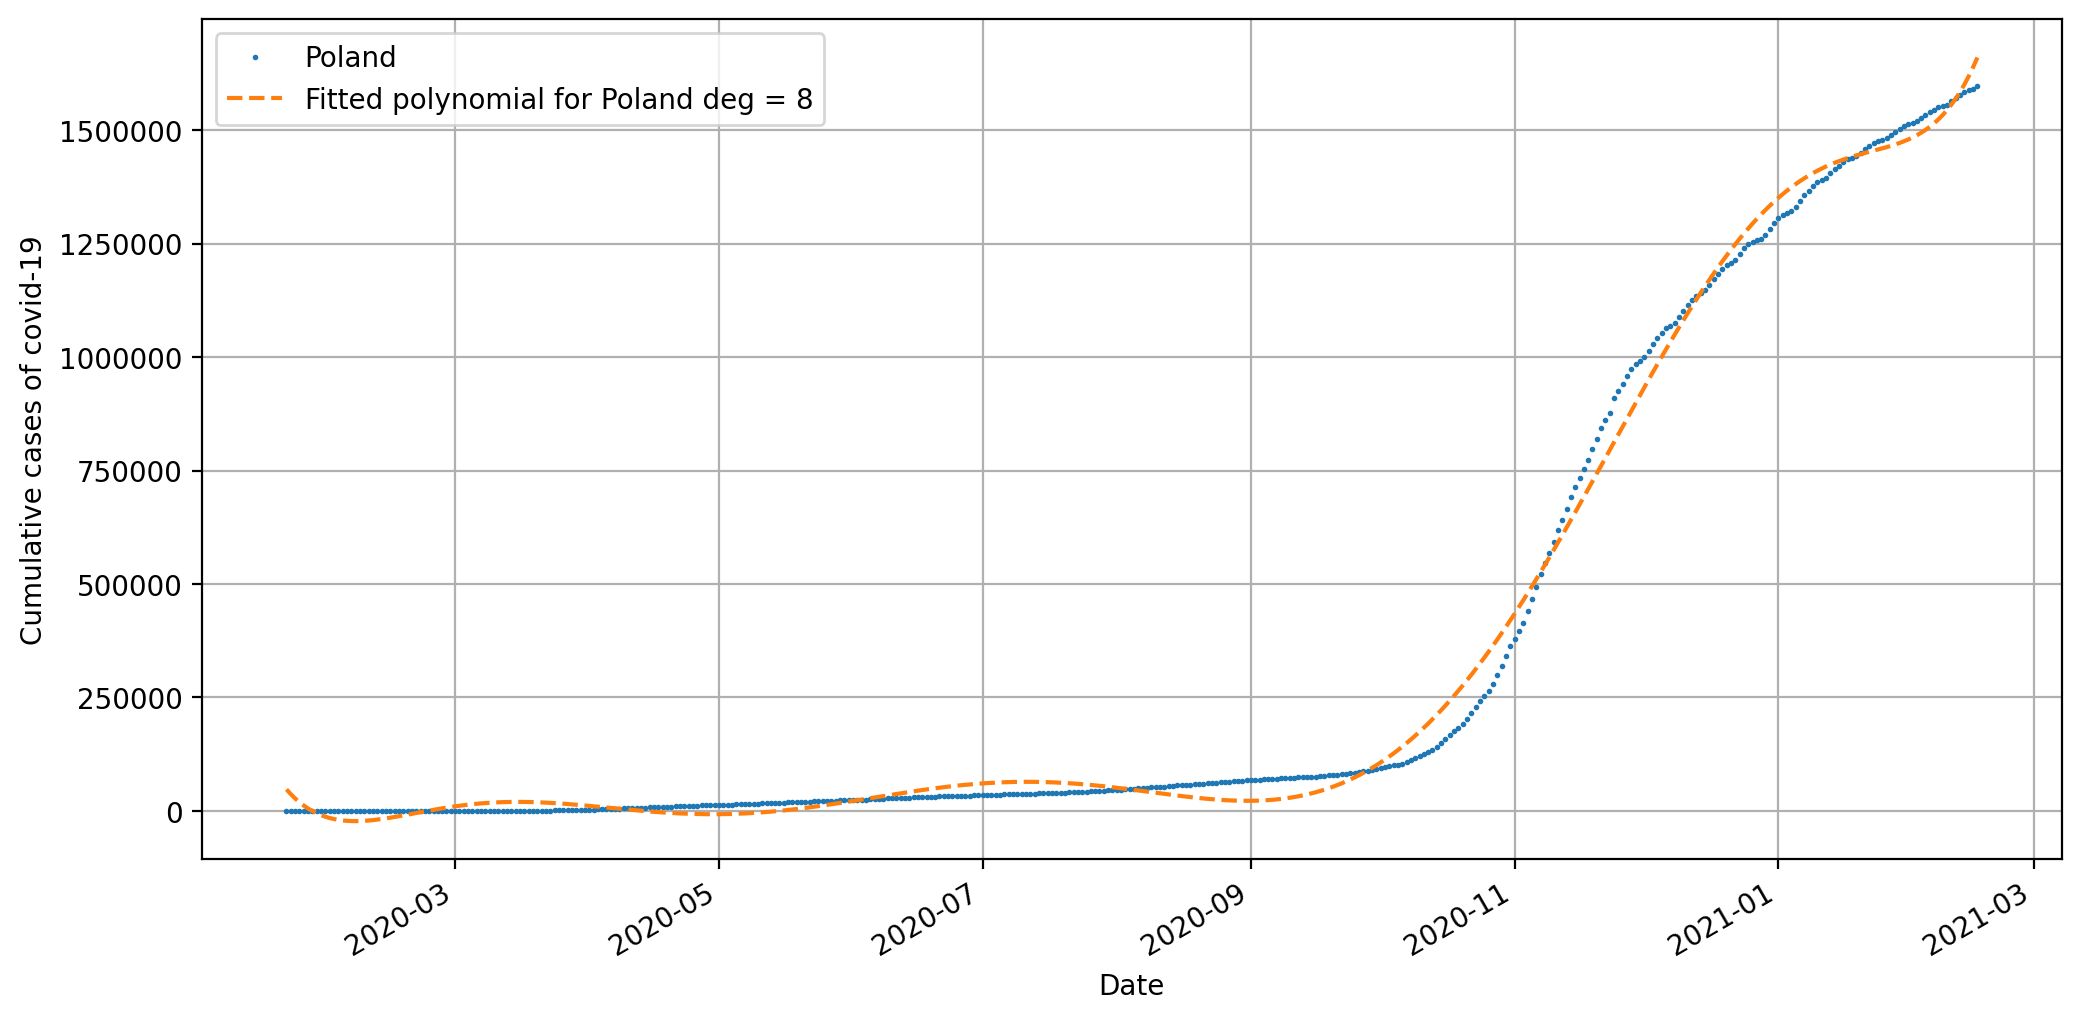

In [14]:
plt.rcParams['figure.figsize'] = [12, 7*3]
plt.rcParams['figure.dpi'] = 200
plt.subplot(3,1,1)
ax = plt.gca()  # get axes
locator = mdates.MonthLocator() # tick every month
ax.ticklabel_format(axis='y', style='plain')
plt.plot(date, USA, 'o', markersize=1)
plt.plot(date, Poland, 'o', markersize=1)
plt.plot(date,poly_function_USA(x_data),"--", markersize = 1)
plt.plot(date,poly_function_Poland(x_data),"--", markersize = 1)
plt.xlabel("Date")
plt.ylabel("Cumulative cases of covid-19")
plt.legend(["USA","Poland",f"Fitted polynomial for USA deg = {USA_deg_poly}",f"Fitted polynomial for Poland deg = {Poland_deg_poly}"],fontsize='medium')
plt.gcf().autofmt_xdate() # 
plt.grid()
plt.show()

plt.subplot(3,1,2)
ax = plt.gca()  # get axes
locator = mdates.MonthLocator() # tick every month
ax.ticklabel_format(axis='y', style='plain')
plt.plot(date, USA, 'o', markersize=1)
plt.plot(date,poly_function_USA(x_data),"--", markersize = 1)
plt.xlabel("Date")
plt.ylabel("Cumulative cases of covid-19")
plt.legend(["USA",f"Fitted polynomial for USA deg = {USA_deg_poly}"],fontsize='medium')
plt.gcf().autofmt_xdate() # 
plt.grid()
plt.show()

plt.subplot(3,1,3)
ax = plt.gca()  # get axes
locator = mdates.MonthLocator() # tick every month
ax.ticklabel_format(axis='y', style='plain')
plt.plot(date, Poland, 'o', markersize=1)
plt.plot(date,poly_function_Poland(x_data),"--", markersize = 1)
plt.xlabel("Date")
plt.ylabel("Cumulative cases of covid-19")
plt.legend(["Poland",f"Fitted polynomial for Poland deg = {Poland_deg_poly}"],fontsize='medium')
plt.gcf().autofmt_xdate() # 
plt.grid()
plt.show()